# Homework 9
### Kaile Zhou

## 1. Closed Laptop Questions. 10 POINTS
Provide the binary values for each bit in the following numpy dtypes:  
    a. `np.int8(7)`   
    b. `np.int16(7)`   
    c. `np.uint8(4)`    

a. 00000111 <br>
b. 0000000000000111 <br>
c. 00000100

## 2. Closed Laptop Questions. 10 POINTS
Provide the strides for each of the folling numpy arrays:  
a. `np.array([[0, 1, 2], [3, 4, 5]], dtype='int32')`  
b. `np.array([[0, 1, 2], [3, 4, 5]], dtype='uint64')`  
c. `np.array([0, 1, 2, 3, 4, 5], dtype='uint32')`  

a. (12,4) <br>
b. (24,8) <br>
c. (4,)

## 3. Consider the following Image. 
![img](whereswaldo.jpg)

### 10 POINTS. 
Consider that you can read this image into python and create a numpy array as follows:

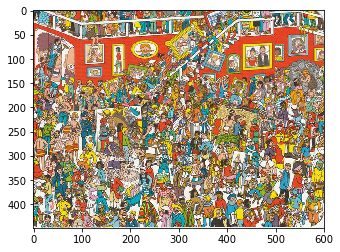

In [1]:
from scipy.misc import imread
import matplotlib.pyplot as plt
%matplotlib inline
waldo = imread('whereswaldo.jpg')
plt.imshow(waldo)

In [3]:
waldo.shape

(449, 600, 3)

### Use array slicing/indexing to obtain...
Look on the red wall. There is an oval frame on the wall containing a man with a red wiggly mustache. Obtain a smaller image of the peron in the frame with the red mustache. Try to get the crop as tight as possible. Save this crop as an object named red_mustache.

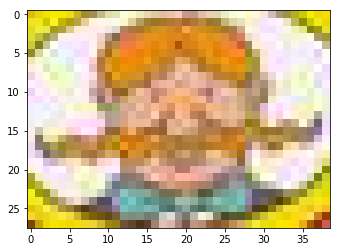

In [29]:
red_mustache = waldo[68:96,212:251,]
plt.imshow(red_mustache)

### 10 POINTS.
What is the dimensions of this crop?  
What are the strides of this crop?

In [30]:
print(red_mustache.shape)
print(red_mustache.strides)

(28, 39, 3)
(1800, 3, 1)


### 10 POINTS.
On the same wall is a frame with a man and woman in a picture. Using the same dimensions as above, crop the original photo so that you get a crop of the man and woman in the picture on the wall. Save this crop as `man_woman`. It's okay if this picture isn't cropped as well, but it should have both people in the crop and have the same dimensions as the `red_mustache` crop.



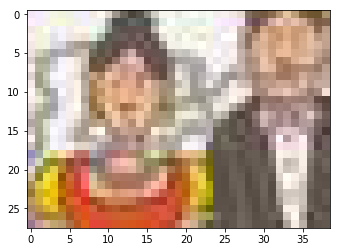

In [32]:
man_woman = waldo[78:106,440:479,]
plt.imshow(man_woman)

### 10 POINTS.
Combine these two images to make one numpy array. Do this in a way that makes it easy for someone who uses the numpy array to quickly understand that it is two distinct arrays.

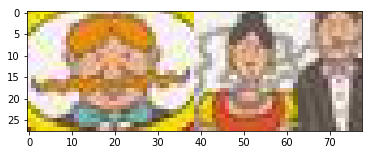

In [195]:
import numpy as np
two_im=np.hstack([red_mustache, man_woman])
plt.imshow(two_im)

## Ordinary Least Squares. 40 Points.
Create a class called `OLS`. 
1. When creating an object from this new type, `OLS` should expect two numpy arrays: `x` and `y`. 
2. For this class, create a method called `beta_coef`. This function should take an optional parameter called `intercept`. If true this function will first add the intercept data to `x`, otherwise, if false, it will assume that information is already present. This function should then return the $\hat{\beta}$ coefficient vector of the least-squares estimate from a linear model.
3. Create a third method called ssr (model sum of squares). This method will calculate the `ssr` as follows:  
$(\hat{y}-\bar{y}_n)^{T}(\hat{y}-\bar{y_{n}})$  

This notation $y_{n}$ denotes a vector of means size $n$. $\hat{y}$ denotes a predicted value.

In [168]:
import numpy as np
from numpy.linalg import inv
class OLS:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def beta_coef(self, intercept=False):
        if intercept is True:
            intercept = np.ones((x.shape[0],1),dtype=x.dtype)
            self.x = np.append(intercept, self.x, axis=1)
        beta = inv((self.x).T.dot(self.x)).dot((self.x).T).dot(self.y)
        return beta
    
    def ssr(self):
        yhat = (self.x).dot(self.beta_coef())
        ssr = (yhat-np.mean(self.y)).T.dot(yhat-np.mean(self.y))
        return ssr
        

In [187]:
x=np.array([[1.5,4,3],[2.1,5,6],[1,7.4,3],[3,1.6,6]], dtype='float32')
y=np.array([4,6,2.5,7.2], dtype='float32')

In [188]:
test=OLS(x,y)

In [189]:
# beta estimates without intercept:
test.beta_coef()

array([ 1.62904167, -0.02044663,  0.42380023], dtype=float32)

In [190]:
test.ssr()

13.392152

In [191]:
# beta estimates with intercept:
test.beta_coef(intercept=True)

array([ 4.32941437, -0.74994278, -0.55143881,  1.00048542], dtype=float32)

In [192]:
test.ssr()

13.067205